In [ ]:
import json
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

In [ ]:
with open('data.json', 'r', encoding='utf-8') as f:
    data = json.load(f)
print(data[0].keys())

dict_keys(['category', 'url', 'title', 'content', 'publish_date', 'text', 'text_embed', 'text_tfidf'])


[373, 1142, 836, 482, 512, 1497, 416, 859, 406, 354, 604, 546, 766, 490, 1145, 574, 475, 599, 414, 139, 333, 969, 426, 535, 852, 1002, 676, 922, 583, 1156, 865, 1381, 638, 786, 1176, 307, 1159, 441, 1005, 670, 690, 623, 504, 587, 673, 540, 673, 1191, 700, 590, 762, 592, 628, 549, 662, 474, 1011, 630, 582, 655, 631, 736, 874, 405, 477, 485, 566, 460, 297, 510, 485, 394, 732, 485, 635, 945, 822, 842, 680, 563, 588, 681, 939, 445, 891, 317, 442, 577, 455, 475, 906, 442, 388, 340, 1064, 1275, 462, 820, 1396, 752, 444, 596, 1055, 866, 928, 495, 1037, 928, 599, 824, 824, 484, 625, 942, 750, 973, 635, 1034, 1054, 521, 604, 508, 547, 755, 997, 2375, 518, 219, 242, 792, 406, 442, 405, 347, 419, 513, 258, 679, 625, 660, 419, 840, 596, 762, 275, 406, 632, 317, 779, 301, 464, 921, 901, 337, 1379, 338, 303, 283, 600, 1091, 227, 665, 1143, 340, 671, 548, 511, 816, 614, 1002, 731, 352, 354, 773, 1222, 1005, 378, 993, 478, 1256, 333, 924, 518, 1409, 802, 375, 396, 660, 705, 853, 960, 770, 543, 582, 69

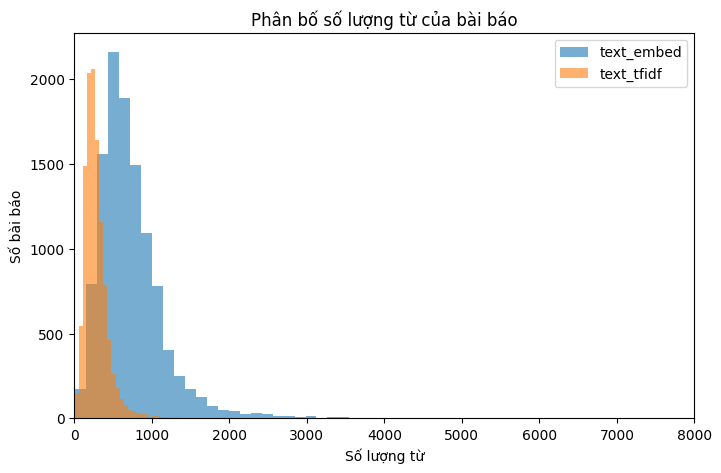

In [ ]:
len_embed = [len(item["text_embed"].split()) for item in data]
len_tfidf = [len(item["text_tfidf"].split()) for item in data]

print(len_embed)
print(len_tfidf)

plt.figure(figsize=(8,5))
plt.hist(len_embed, bins=500, alpha=0.6, label="text_embed")
plt.hist(len_tfidf, bins=500, alpha=0.6, label="text_tfidf")
plt.xlim(0, 8000)

plt.xlabel("Số lượng từ")
plt.ylabel("Số bài báo")
plt.title("Phân bố số lượng từ của bài báo")
plt.legend()
plt.show()

In [ ]:
length_df = pd.DataFrame({
    "text_embed": len_embed,
    "text_tfidf": len_tfidf
})

print(length_df.describe(percentiles=[]).round(2))

       text_embed  text_tfidf
count    11226.00    11226.00
mean       739.81      284.38
std        849.29      318.40
min         10.00        4.00
50%        636.00      248.00
max      70776.00    26346.00


In [ ]:
# tính vocabulary size (TF-IDF)
vocab_tfidf = set()
for item in data:
    vocab_tfidf.update(item["text_tfidf"].split())
vocab_size = len(vocab_tfidf)

# tổng số token TF-IDF
total_tokens = sum(len(item["text_tfidf"].split()) for item in data)

# độ đa dạng vốn từ (TTR)
lexical_diversity = (vocab_size / total_tokens) * 100

vocab_size, total_tokens, lexical_diversity

(103850, 3192487, 3.252949816240442)

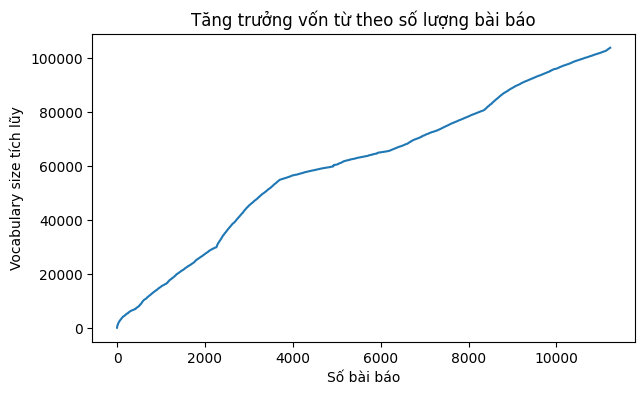

In [ ]:
vocab_progress = set()
vocab_sizes = []

for item in data:
    vocab_progress.update(item["text_tfidf"].split())
    vocab_sizes.append(len(vocab_progress))

plt.figure(figsize=(7,4))
plt.plot(vocab_sizes)
plt.xlabel("Số bài báo")
plt.ylabel("Vocabulary size tích lũy")
plt.title("Tăng trưởng vốn từ theo số lượng bài báo")
plt.show()

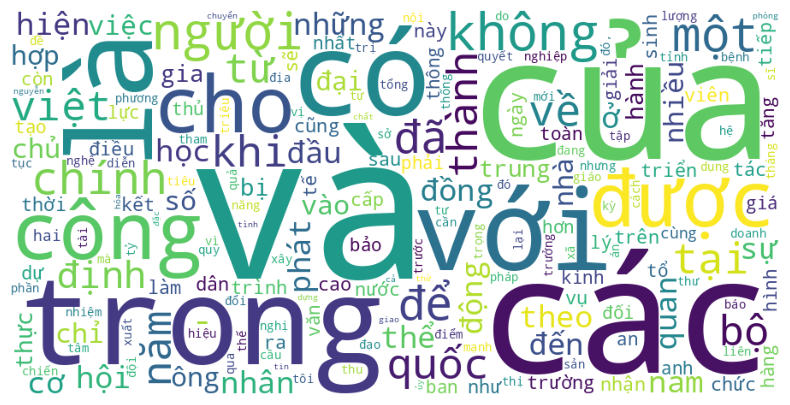

In [ ]:
tokens = []
for item in data:
    tokens.extend(item["text"].split())

freq = Counter(tokens)

wc = WordCloud(width=900, height=450, background_color="white") \
     .generate_from_frequencies(freq)

plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis("off")
plt.show()

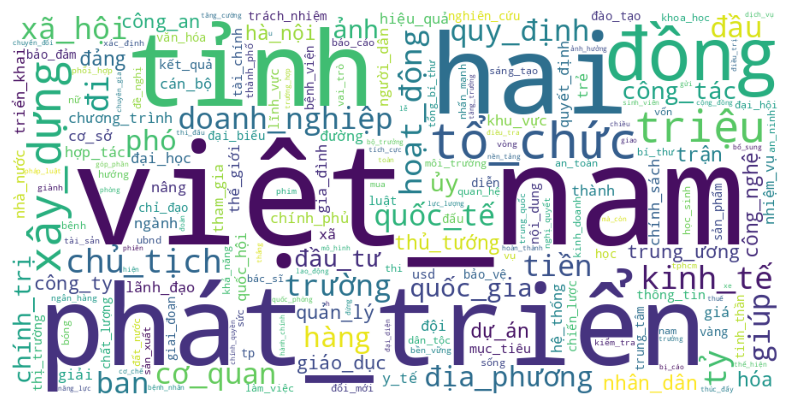

In [ ]:
tokens = []
for item in data:
    tokens.extend(item["text_tfidf"].split())

freq = Counter(tokens)

wc = WordCloud(width=900, height=450, background_color="white") \
     .generate_from_frequencies(freq)

plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis("off")
plt.show()

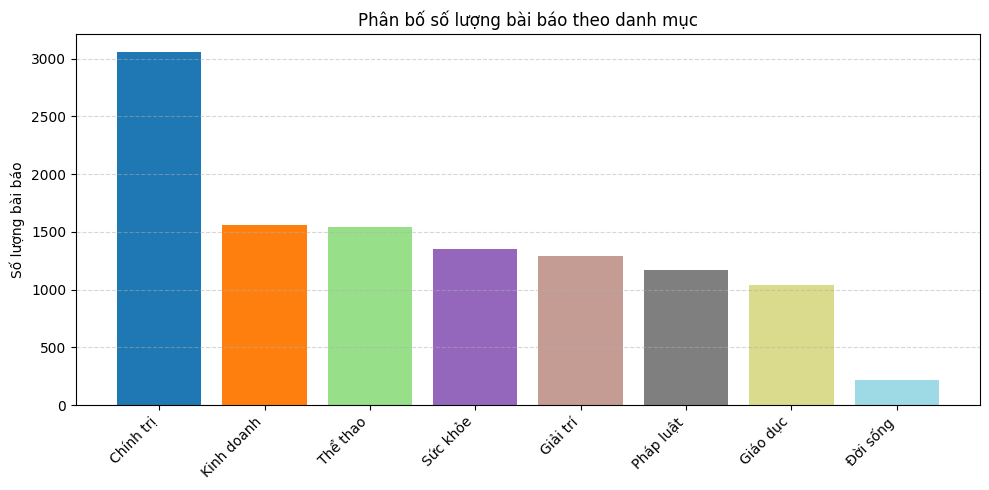

In [ ]:
category_counts = Counter(item["category"] for item in data)

df_category = pd.DataFrame(
    category_counts.items(),
    columns=["Category", "Số lượng bài báo"]
).sort_values(by="Số lượng bài báo", ascending=False)

colors = plt.cm.tab20(np.linspace(0, 1, len(df_category)))

plt.figure(figsize=(10, 5))
plt.bar(
    df_category["Category"],
    df_category["Số lượng bài báo"],
    color=colors
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Số lượng bài báo")
plt.title("Phân bố số lượng bài báo theo danh mục")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()